=== 5 Baris Pertama dari Dataset ===
         Order ID     Month  Year           City    Segment         Category  \
0  CA-2014-156587     Maret  2014    DKI Jakarta   Consumer        Furniture   
1  CA-2014-156587     Maret  2014     Jawa Barat   Consumer  Office Supplies   
2  CA-2014-152905  Februari  2014         Banten   Consumer  Office Supplies   
3  CA-2014-156587     Maret  2014    Jawa Tengah   Consumer  Office Supplies   
4  CA-2014-157644  Desember  2014  DI Yogyakarta  Corporate       Technology   

  Sub-Category                                       Product Name       Sales  \
0       Chairs         Global Push Button Manager's Chair, Indigo   USD 48,71   
1      Storage            Carina 42"Hx23 3/4"W Media Storage Unit  USD 242,94   
2      Storage                                 Akro Stacking Bins   USD 12,62   
3          Art                                         Newell 330   USD 17,94   
4  Accessories  Verbatim 25 GB 6x Blu-ray Single Layer Recorda...   USD 34,77

C:\Users\user\AppData\Local\Temp\ipykernel_5148\913810039.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_2014, x='Category', order=category_counts.index, palette="pastel")


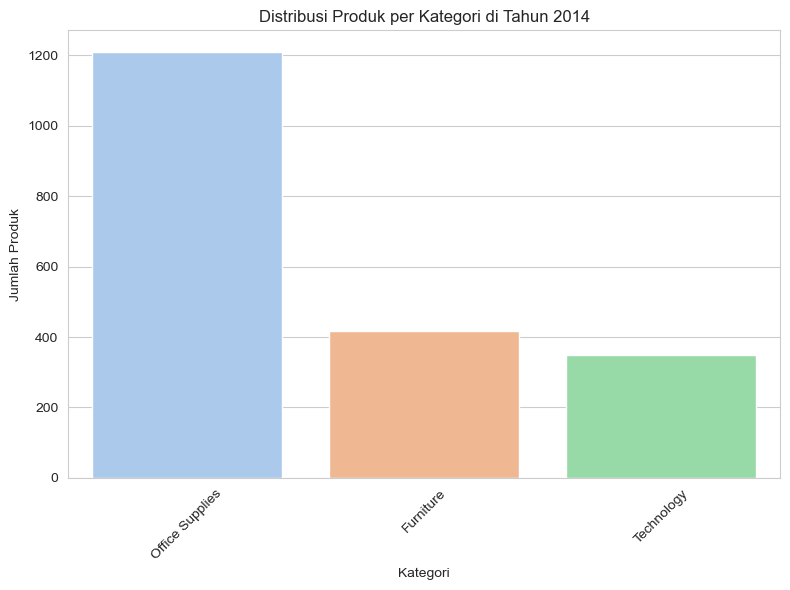

2. Top 20 Produk Furniture dengan Frekuensi Tertinggi
1. KI Adjustable-Height Table: 18
2. Staple-based wall hangings: 16
3. Situations Contoured Folding Chairs, 4/Set: 15
4. Global High-Back Leather Tilter, Burgundy: 14
5. Global Wood Trimmed Manager's Task Chair, Khaki: 14
6. Eldon Wave Desk Accessories: 14
7. Chromcraft Round Conference Tables: 13
8. SAFCO Arco Folding Chair: 13
9. Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back: 12
10. Flat Face Poster Frame: 12
11. Bretford Rectangular Conference Table Tops: 12
12. Eldon Expressions Wood Desk Accessories, Oak: 12
13. Global Leather Highback Executive Chair with Pneumatic Height Adjustment, Black: 11
14. DMI Arturo Collection Mission-style Design Wood Chair: 11
15. Global Ergonomic Managers Chair: 11
16. O'Sullivan Living Dimensions 2-Shelf Bookcases: 10
17. Longer-Life Soft White Bulbs: 10
18. Global Value Mid-Back Manager's Chair, Gray: 10
19. Hon Olson Stacker Stools: 10
20. DAX Value U-Channel Document Frames, Easel

C:\Users\user\AppData\Local\Temp\ipykernel_5148\913810039.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_furniture.index, x=top_furniture.values, palette='Blues_d')


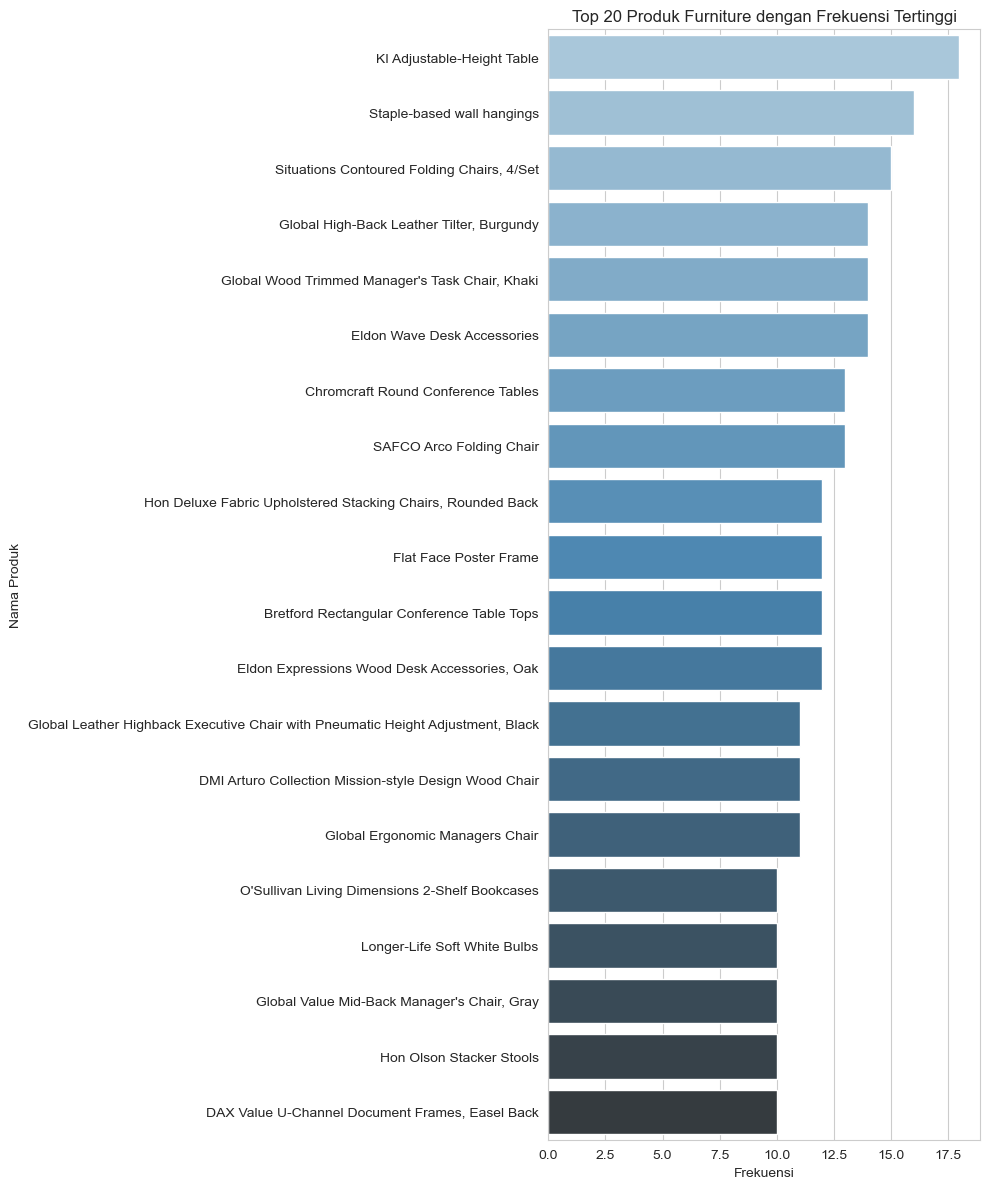

3. Produk dengan frekuensi tertinggi di kategori Technology: Logitech 910-002974 M325 Wireless Mouse for Web Scrolling

4. Jumlah Transaksi per Tahun di DKI Jakarta (2014-2017)
   2014: 283 transaksi
   2015: 297 transaksi
   2016: 365 transaksi
   2017: 467 transaksi


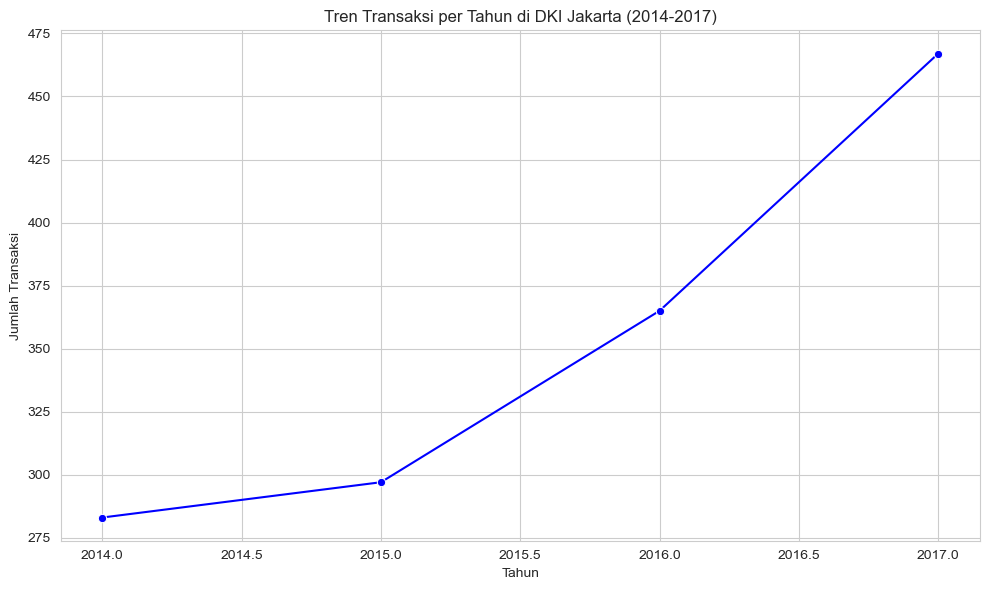

5. Peluang pembeli Corporate membeli Office Supplies pada 2015: 59.08%



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi visualisasi
sns.set_style('whitegrid')
%matplotlib inline

# File CSV dengan percobaan beberapa encoding
file_path = "Data Sales.csv"
encodings = ['windows-1252', 'utf-8', 'ISO-8859-1']

for enc in encodings:
    try:
        df = pd.read_csv(file_path, encoding=enc, delimiter=';')
        break
    except UnicodeDecodeError:
        continue
    except FileNotFoundError:
        print(f"File '{file_path}' tidak ditemukan.")
        df = None
        break

# Jika data berhasil dibaca
if df is not None:
    df.columns = df.columns.str.strip()  # Bersihkan nama kolom dari spasi

    print("=== 5 Baris Pertama dari Dataset ===")
    print(df.head(), "\n")

    # Validasi kolom penting
    required_columns = {'Year', 'Category', 'Product Name', 'City', 'Segment'}
    missing_columns = required_columns - set(df.columns)

    if missing_columns:
        print(f"Kolom berikut tidak ditemukan dalam dataset: {missing_columns}\n")
    else:
        # Konversi kolom Year ke numerik
        df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

        df_2014 = df[df['Year'] == 2014]
        if not df_2014.empty:
            print("="*50)
            print("1. Distribusi Frekuensi Kategori Produk pada Tahun 2014")
            category_counts = df_2014['Category'].value_counts()
            for i, (category, count) in enumerate(category_counts.items(), 1):
                print(f"{i}. {category}: {count}")

            plt.figure(figsize=(8, 6))
            sns.countplot(data=df_2014, x='Category', order=category_counts.index, palette="pastel")
            plt.title('Distribusi Produk per Kategori di Tahun 2014')
            plt.xlabel('Kategori')
            plt.ylabel('Jumlah Produk')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print("1. Tidak ada data untuk tahun 2014.\n")

        df_furniture = df[df['Category'] == 'Furniture']
        if not df_furniture.empty:
            print("="*50)
            top_furniture = df_furniture['Product Name'].value_counts().nlargest(20)
            print("2. Top 20 Produk Furniture dengan Frekuensi Tertinggi")
            for i, (product, count) in enumerate(top_furniture.items(), 1):
                print(f"{i}. {product}: {count}")

            plt.figure(figsize=(10, 12))
            sns.barplot(y=top_furniture.index, x=top_furniture.values, palette='Blues_d')
            plt.title('Top 20 Produk Furniture dengan Frekuensi Tertinggi')
            plt.xlabel('Frekuensi')
            plt.ylabel('Nama Produk')
            plt.tight_layout()
            plt.show()
        else:
            print("2. Tidak ada data untuk kategori Furniture.\n")

        df_technology = df[df['Category'] == 'Technology']
        if not df_technology.empty:
            print("="*50)
            top_tech_product = df_technology['Product Name'].value_counts().idxmax()
            print(f"3. Produk dengan frekuensi tertinggi di kategori Technology: {top_tech_product}\n")
        else:
            print("3. Tidak ada data untuk kategori Technology.\n")

        df_jakarta = df[df['City'] == 'DKI Jakarta']
        if not df_jakarta.empty:
            print("="*50)
            transactions_per_year = df_jakarta.groupby('Year').size()
            print("4. Jumlah Transaksi per Tahun di DKI Jakarta (2014-2017)")
            for year, count in transactions_per_year.items():
                print(f"   {year}: {count} transaksi")

            plt.figure(figsize=(10, 6))
            sns.lineplot(x=transactions_per_year.index, y=transactions_per_year.values,
                         marker='o', color='b')
            plt.title('Tren Transaksi per Tahun di DKI Jakarta (2014-2017)')
            plt.xlabel('Tahun')
            plt.ylabel('Jumlah Transaksi')
            plt.grid(True)
            plt.tight_layout()
            plt.show()
        else:
            print("4. Tidak ada data untuk kota DKI Jakarta.\n")

        df_2015_corporate = df[(df['Year'] == 2015) & (df['Segment'] == 'Corporate')]
        if not df_2015_corporate.empty:
            print("="*50)
            total_corporate = len(df_2015_corporate)
            office_supplies_count = (df_2015_corporate['Category'] == 'Office Supplies').sum()
            probability = office_supplies_count / total_corporate

            print(f"5. Peluang pembeli Corporate membeli Office Supplies pada 2015: {probability:.2%}\n")
        else:
            print("5. Tidak ada transaksi Corporate pada tahun 2015.\n")
